# Zbiór danych
Zbiór danych *kredyt.csv* zawiera informacje dotyczące wniosków o kredyt hipoteczny w penym banku. Poszczególne kolumny reprezentują różne cechy związane z każdym wnioskiem:

- Loan_ID: Unikalny identyfikator każdego wniosku o kredyt.
- Gender: Płeć osoby składającej wniosek (mężczyzna/kobieta).
- Married: Status małżeński (żonaty/nie).
- Dependents: Liczba osób na utrzymaniu osoby składającej wniosek.
- Education: Poziom edukacji osoby składającej wniosek.
- Self_Employed: Czy osoba składająca wniosek jest samozatrudniona (tak/nie).
- ApplicantIncome: Dochód osoby składającej wniosek.
- CoapplicantIncome: Dochód współmałżonka lub współmałżonki osoby składającej wniosek.
- LoanAmount: Kwota kredytu hipotecznego wnioskowana przez osobę składającą wniosek.
- Loan_Amount_Term: Okres kredytowania (w miesiącach).
- Credit_History: Historia kredytowa (czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie).
- Property_Area: Lokalizacja nieruchomości (miejska/półmiejska/wiejska).
- Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).

# Zadanie
Przeprowadź eksploracyjną analizę danych zawartych w zbiorze *kredyt.csv*.
W tym celu wykonaj m.in. nastepujące kroki:
- zaimportj potrzebne biblioteki
- wczytaj zbiór danych
- scharakteryzuj zbiór (kształt, rodzaj zmiennych, statystyki opisowe)
- sprwdź, czy w zbiorze są jakieś braki, jeśli tak zadecyduj co z nimi zrobić
- postaw minimum 3 pytania badawcze / hipotezy badawcze; pytania badawcze powinny być złożone (np. hipoteza badawcza: "kredyt przyznawany jest częściej mężczyzną" jest zbyt trwialna); za pomocą wykresów określ, czy postawione hipotezy były słuszne czynie
- podsumuj jakie wnioski można wyciągnąć po przeprowadzonej analizie  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kredyt.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
rows, cols = df.shape

print("Dataframe shape", rows, cols)
print()

df.info()

Dataframe shape 614 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df = df.dropna()

new_rows, new_cols = df.shape

print("Dataframe shape", new_rows, new_cols, "rows removed", rows - new_rows)

Dataframe shape 480 13 rows removed 134


# Hipoteza 1

### Kwota kredytu jest wyższa dla osób z wyższym wykształceniem w porównaniu do osób z wykształceniem podstawowym, ale tylko w przypadku osób z pozytywną historią kredytową.

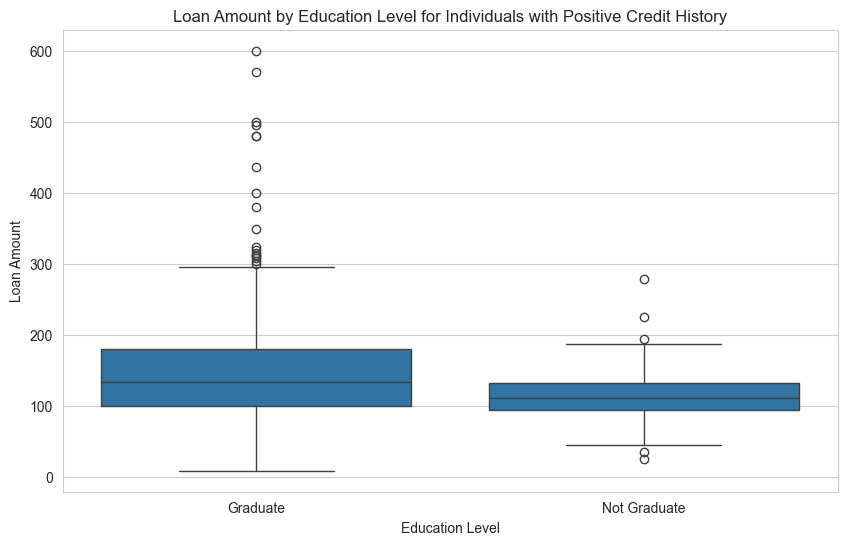

In [14]:
positive_credit_history = df[df['Credit_History'] == 1]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='LoanAmount', data=positive_credit_history)
plt.title(
    'Loan Amount by Education Level for Individuals with Positive Credit History')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()

Wykres potwierdza hipotezę: pokazuje, że osoby z wyższym wykształceniem mają wyższą medianę kwoty kredytu niż osoby bez wyższego wykształcenia, ograniczając się do tych z pozytywną historią kredytową. Rozpiętość i wyższe wartości odstające dla absolwentów sugerują także, że w tej grupie występują wyższe kwoty kredytów.

# Hipoteza 2

### Istnieje większa szansa zatwierdzenia kredytu dla osób samozatrudnionych posiadających nieruchomość w obszarze miejskim w porównaniu z osobami samozatrudnionymi w innych obszarach.

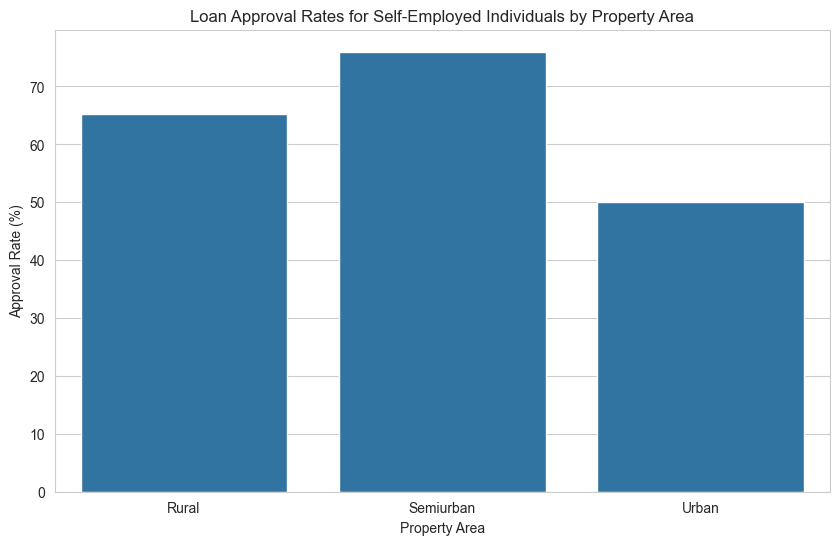

In [17]:
self_employed_data = df[df['Self_Employed'] == 'Yes']

approval_rates = self_employed_data.groupby(
    'Property_Area')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)

approval_rates = approval_rates.multiply(100)

approval_rates.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Property_Area', y='Y', data=approval_rates)

plt.title('Loan Approval Rates for Self-Employed Individuals by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Approval Rate (%)')
plt.show()

Wykres wskazuje, że osoby samozatrudnione z obszaru półmiejskiego mają najwyższy wskaźnik zatwierdzenia pożyczek, a osoby z obszarów miejskich mają niższy wskaźnik, co stoi w sprzeczności z hipotezą. Hipoteza zakładała wyższe prawdopodobieństwo zatwierdzenia dla osób samozatrudnionych z obszarów miejskich, co nie zostało potwierdzone na tym wykresie.

# Hipoteza 3

### Poziom dochodu wnioskodawcy i historii kredytowej wspólnie wpływają na wysokość kwoty kredytu. Wnioskodawcy z wyższym dochodem i pozytywną historią kredytową są w stanie otrzymać wyższe kwoty kredytów niż osoby z niższym dochodem lub negatywną historią kredytową.

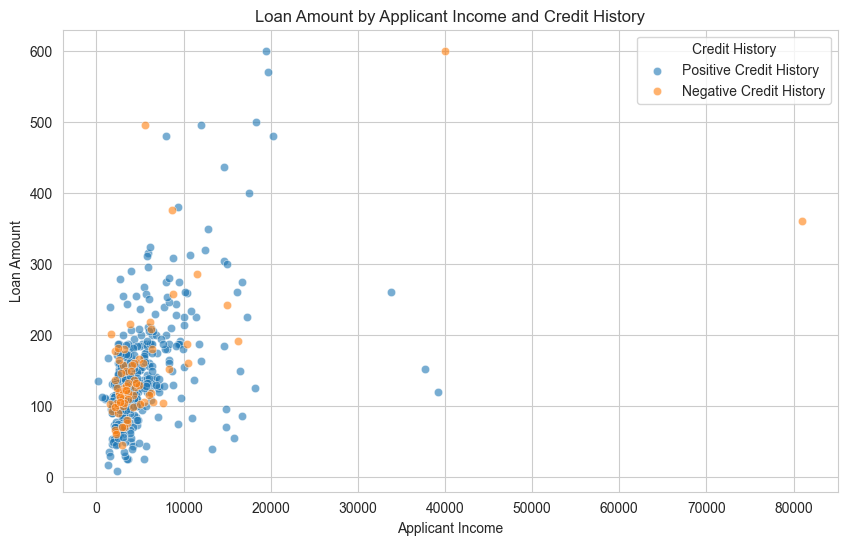

In [20]:
positive_credit_history = df[df['Credit_History'] == 1]
negative_credit_history = df[df['Credit_History'] == 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount',
                data=positive_credit_history, label='Positive Credit History', alpha=0.6)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount',
                data=negative_credit_history, label='Negative Credit History', alpha=0.6)

plt.title('Loan Amount by Applicant Income and Credit History')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Credit History')
plt.show()

Wykres wyraźnie pokazuje, że większość wnioskodawców z pozytywną historią kredytową otrzymała kredyty na wyższe kwoty niezależnie od dochodu, co wspiera hipotezę. Osoby z negatywną historią kredytową generalnie otrzymywały niższe kwoty pożyczek, co dodatkowo potwierdza postawioną tezę.